In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the IMDb dataset from the "movie_metadata.csv" file
file_path = "movie_metadata.csv"
df = pd.read_csv(file_path)

# Splitting genres into a list
df["genres_list"] = df["genres"].str.split("|")

# Calculating the total number of genres
total_genres = df["genres_list"].explode().nunique()

# Calculating the total number of movies
total_movies = len(df)

print(f"Total genres: {total_genres}")
print(f"Total nodes: {total_movies}")
print()


Total genres: 26
Total nodes: 5043



C:\Users\HP\AppData\Local\Temp\ipykernel_3372\3438305263.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="magma")


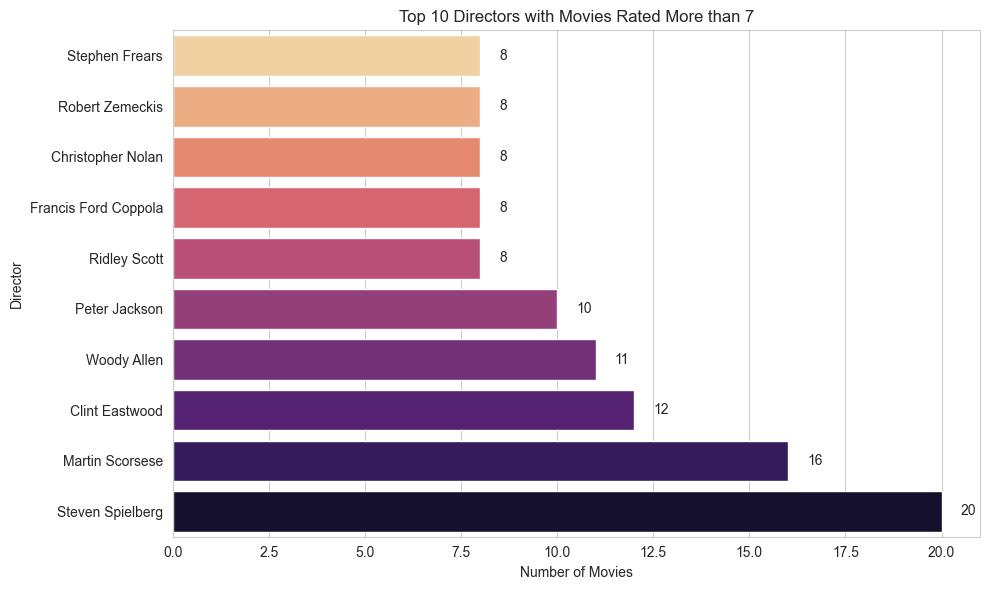

In [99]:
# Filter movies with rating more than 7
high_rated_movies = df[df['imdb_score'] > 7]

# Count movies for each director
director_counts = high_rated_movies['director_name'].value_counts()

# Get top 10 directors with the most counts
top_10_directors = director_counts.head(10)

# Plotting the top 10 directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette="magma")

plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 10 Directors with Movies Rated More than 7")
plt.gca().invert_yaxis() 

# Adding value labels to the bars
for i, count in enumerate(top_10_directors):
    plt.text(count + 0.5, i, str(count), va='center', fontsize=10)

plt.tight_layout()
plt.show()


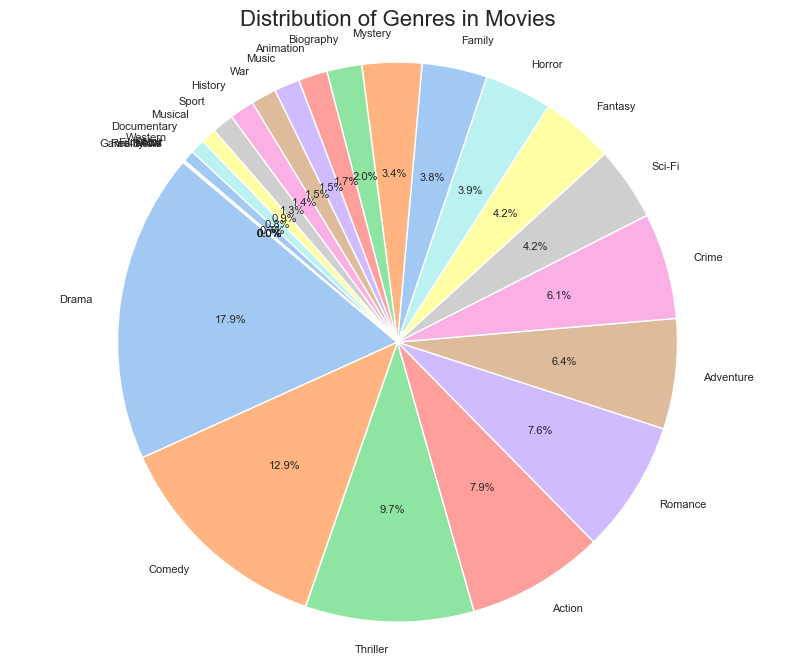

In [103]:
# Splitting the genres 
genres_stacked = df['genres'].str.split('|', expand=True).stack()

# Counting the occurrences of each genre
genre_counts = genres_stacked.value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"), textprops={'fontsize': 8})
plt.title('Distribution of Genres in Movies', fontsize=16)
plt.axis('equal')  
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_3372\805453891.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hindi_high_rating_genre_counts.index, y=hindi_high_rating_genre_counts.values, palette='muted')


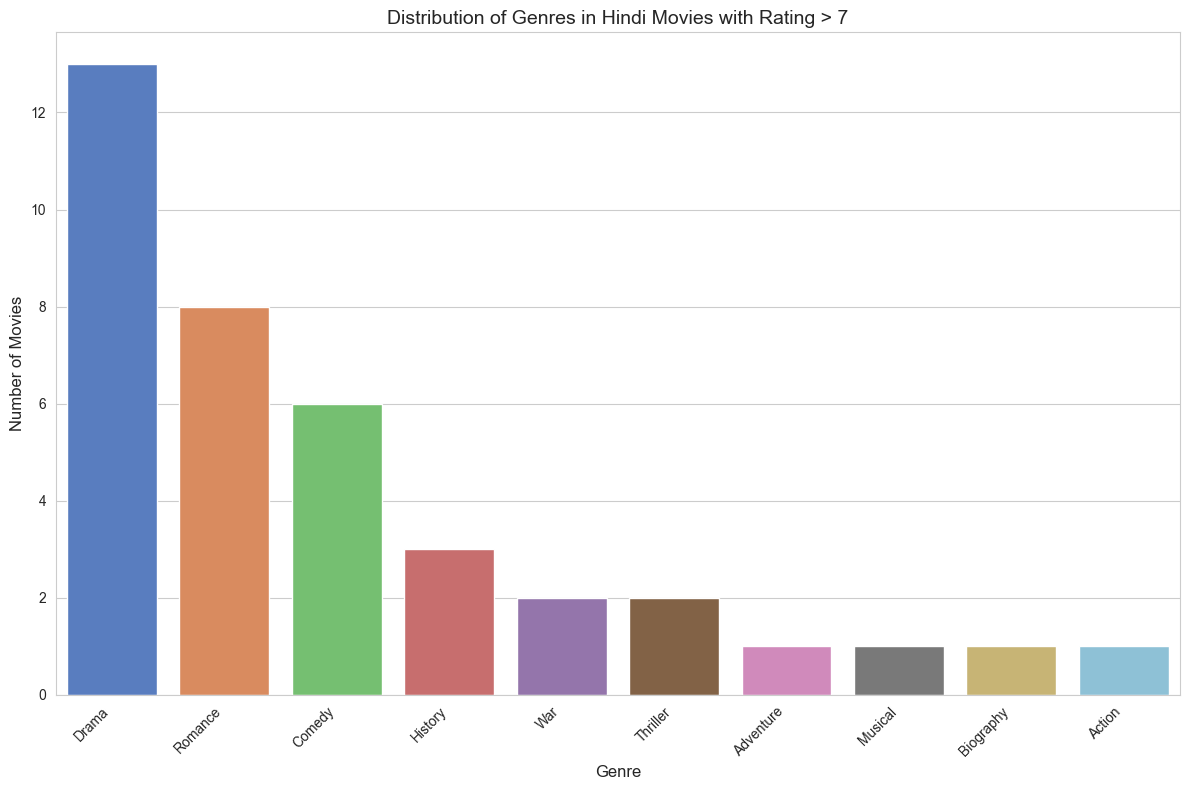

In [106]:
# Set Seaborn style
sns.set_style("whitegrid")

# Filter the dataset to include only Hindi-language movies with rating > 7
hindi_high_rating_movies = df[(df['language'] == 'Hindi') & (df['imdb_score'] > 7)]

# Splitting the genres and stacking them for Hindi movies with high ratings
hindi_high_rating_genres_stacked = hindi_high_rating_movies['genres'].str.split('|', expand=True).stack()

# Counting the occurrences of each genre in Hindi movies with high ratings
hindi_high_rating_genre_counts = hindi_high_rating_genres_stacked.value_counts()

# Plotting the bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=hindi_high_rating_genre_counts.index, y=hindi_high_rating_genre_counts.values, palette='muted')
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Genres in Hindi Movies with Rating > 7", fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Total number of edges: 6665750


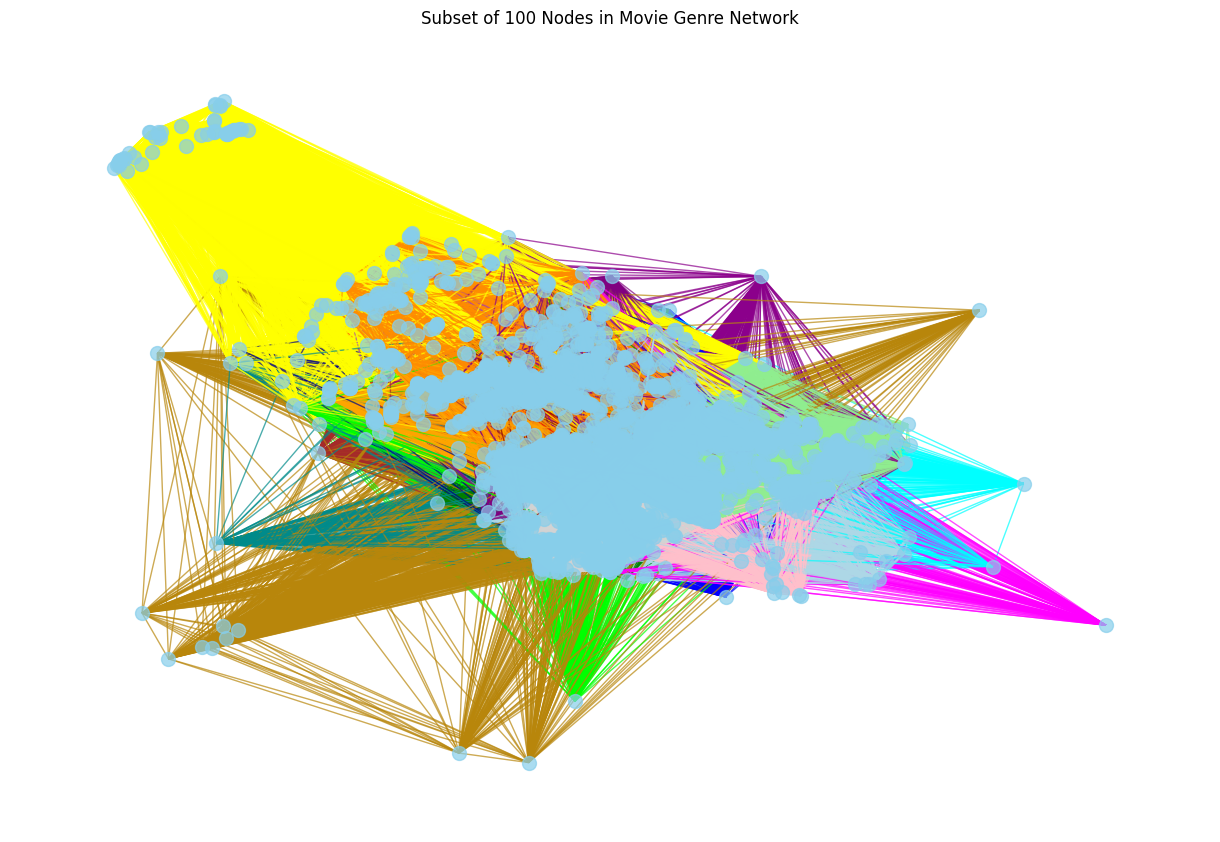

In [73]:
# Assigning colors to genres based on counts
genre_colors = {
    'Action': 'red',
    'Adventure': 'green',
    'Fantasy': 'blue',
    'Sci-Fi': 'purple',
    'Thriller': 'orange',
    'Documentary': 'yellow',
    'Romance': 'pink',
    'Animation': 'cyan',
    'Comedy': 'lightgreen',
    'Family': 'lightblue',
    'Musical': 'magenta',
    'Mystery': 'brown',
    'Western': 'darkgoldenrod',
    'Drama': 'lightgray',
    'History': 'darkcyan',
    'Sport': 'darkorchid',
    'Crime': 'darkred',
    'Horror': 'darkorange',
    'War': 'darkblue',
    'Biography': 'lime',
    'Music': 'darkmagenta',
    'Game-Show': 'gold',
    'Reality-TV': 'lavender',
    'News': 'lightcoral',
    'Short': 'lightpink',
    'Film-Noir': 'indigo'
}

# Extracting relevant columns
movies_subset = df[['movie_title', 'genres']]

# Creating a dictionary to store genres for each movie
movie_genres = {}

# Populating the dictionary
for _, row in movies_subset.iterrows():
    movie_title = row['movie_title']
    genres = row['genres']
    movie_genres[movie_title] = genres

# Creating edges between movies with shared genres
edges = set()  # Use a set to ensure uniqueness of edges
visited_movies = set()  # Keep track of visited movies

# Get a list of nodes from the graph
nodes_list = list(movie_genres.keys())

# subset_nodes = random.sample(nodes_list, 300)

for movie1 in nodes_list:
    visited_movies.add(movie1)  # Mark movie1 as visited
    for movie2 in nodes_list:
        if movie2 not in visited_movies:  
            genres1 = movie_genres[movie1]
            genres2 = movie_genres[movie2]
            common_genres = set(genres1.split('|')) & set(genres2.split('|'))
            if common_genres:
                # Ensure movie1 comes before movie2 in the edge tuple to avoid duplicates
                edge = (movie1, movie2, tuple(common_genres))  
                edges.add(edge)


# Calculating the total number of edges
total_edges = len(edges)
print(f"Total number of edges: {total_edges}")

# Network Graph

# Creating an empty graph
G = nx.Graph()

# Adding nodes (movies) to the graph with genres as attributes
for movie_title in nodes_list:
    G.add_node(movie_title, genres=movie_genres[movie_title])

# Adding edges (shared genres) to the graph

for edge in edges:
    movie1, movie2, attrs = edge
    G.add_edge(movie1, movie2, common_genres=attrs)  # Add common_genres as an edge attribute

# Coloring edges based on their common genres
edge_colors = []
for u, v, attrs in G.edges(data=True):
    common_genres = attrs['common_genres']
    if common_genres:
        genre = list(common_genres)[0]  # Get the first common genre
        if genre in genre_colors:
            edge_colors.append(genre_colors[genre])
    else:
        edge_colors.append('gray')  # Default color for edges without common genres

# Visualizing the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=    False, node_size=50, font_size=10, node_color='skyblue', edge_color=edge_colors, alpha=0.7)
plt.title("Movie Genre Network")
plt.show()


In [76]:
# Average Degree
# Calculating the average degree
deg = total_edges
mov = total_movies
average_degree = (2*deg)/mov

print(f"Average degree: {average_degree:.2f}")

Average degree: 2643.57


In [75]:
# Density of the Graph

print("Density of the Graph: ", nx.density(G))

Density of the Graph:  0.5515271985256313


In [77]:
#4 Missing Value Analysis
import pandas as pd

# Loading the CSV file into a DataFrame
df = pd.read_csv('movie_metadata.csv')

# Checking for missing values in each column
missing_values = df.isnull().sum()

# Printing missing values count for each column
print("Missing values count for each column:")
print(missing_values)

# Deciding on appropriate strategies for handling missing values
for column in df.columns:
    missing_count = missing_values[column]
    total_count = len(df)
    missing_percentage = (missing_count / total_count) * 100
    print("\nColumn:", column)
    print("Missing values:", missing_count)
    print("Percentage of missing values: {:.2f}%".format(missing_percentage))
    if missing_percentage > 0:
        # Deciding on the strategy based on the percentage of missing values
        if missing_percentage <= 5:
            # If missing percentage is low, consider imputation with mean, median, or mode
            print("Strategy: Impute missing values (mean, median, or mode)")
        else:
            # If missing percentage is high, consider deletion of rows or columns
            print("Strategy: Delete rows or columns with missing values")



Missing values count for each column:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Column: color
Missing va

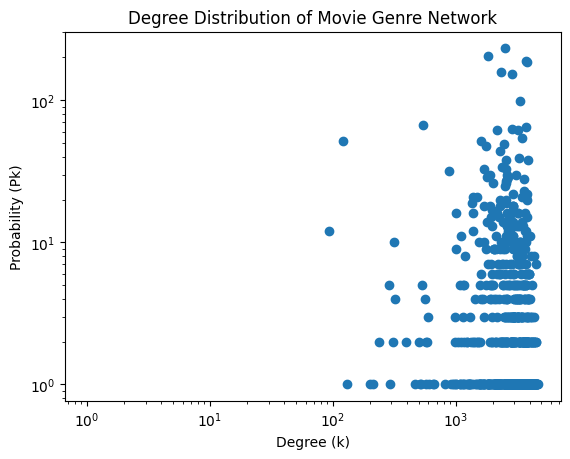

In [78]:
#5 Degree Distribution
degrees = G.degree()

# Getting the degree values
degree_values = [degree for _, degree in degrees]

# Calculating the degree frequency
degree_frequency = nx.degree_histogram(G)

# Plotting the degree distribution (log-log scale)
plt.loglog(range(len(degree_frequency)), degree_frequency, marker='o', linestyle='none')
plt.title('Degree Distribution of Movie Genre Network')
plt.xlabel('Degree (k)')
plt.ylabel('Probability (Pk)')
plt.show()


In [79]:
# Checking if the graph is bipartite
is_bipartite = nx.bipartite.is_bipartite(G)

if is_bipartite:
    print("The graph is bipartite.")
else:
    print("The graph is not bipartite.")

The graph is not bipartite.


In [80]:
# Average shortest path
import math

print(f'Average shortest path length: ', math.log(total_movies) / math.log(average_degree))


Average shortest path length:  1.081964740503273


In [81]:
# Checking if the graph is weighted
is_weighted = nx.is_weighted(G)

if is_weighted:
    print("The graph is weighted.")
else:
    print("The graph is not weighted.")

The graph is not weighted.


In [82]:
# Network connectivity
print("Is connected:", nx.is_connected(G))


Is connected: True


Total number of edges: 6665750


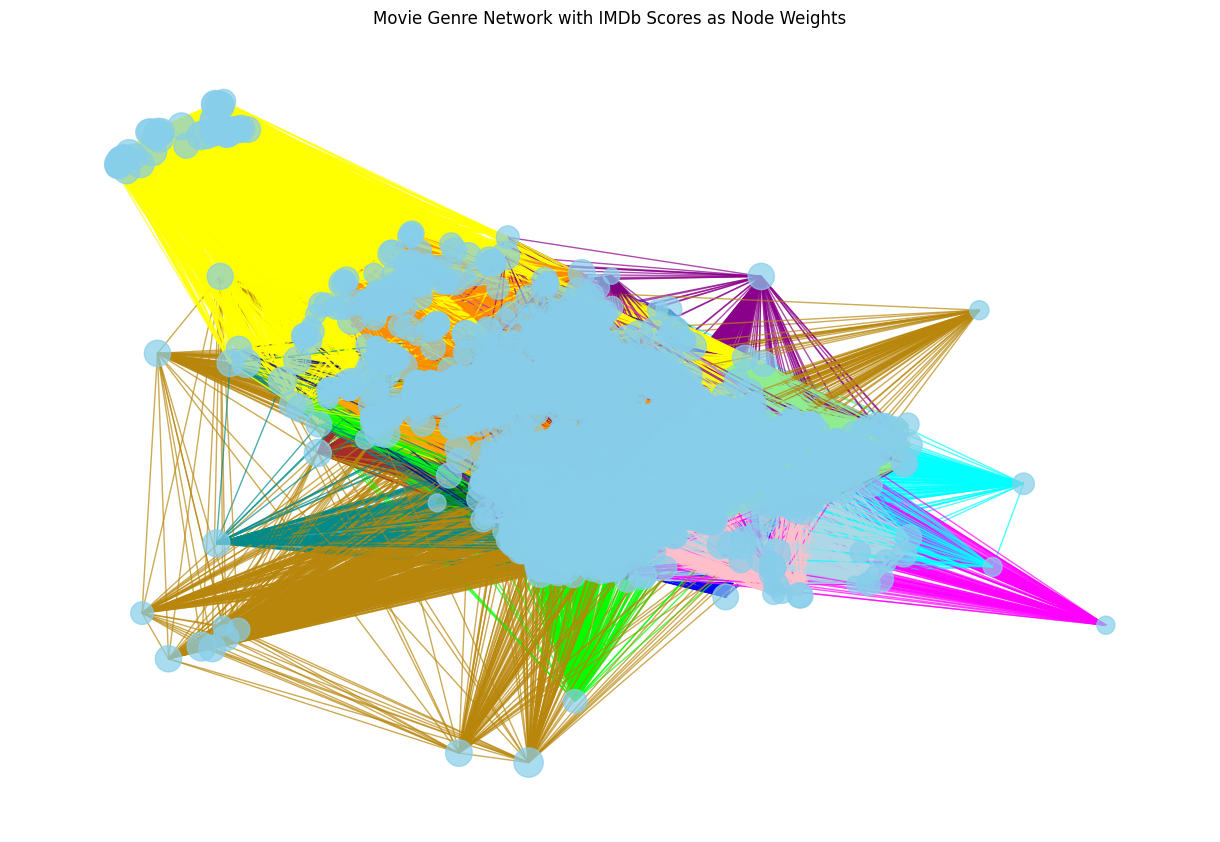

In [87]:
# Extracting relevant columns
movies_subset = df[['movie_title', 'genres', 'imdb_score']]


# Creating a dictionary to store genres and IMDb scores for each movie
movie_genres = {}
movie_scores = {}

# Populating the dictionaries
for _, row in movies_subset.iterrows():
    movie_title = row['movie_title']
    genres = row['genres']
    imdb_score = row['imdb_score']
    movie_genres[movie_title] = genres
    movie_scores[movie_title] = imdb_score

# Creating edges between movies with shared genres
edges = set()  # Use a set to ensure uniqueness of edges
visited_movies = set()  # Keep track of visited movies

# Get a list of nodes from the graph
nodes_list = list(movie_genres.keys())

for movie1 in nodes_list:
    visited_movies.add(movie1)  # Mark movie1 as visited
    for movie2 in nodes_list:
        if movie2 not in visited_movies:  
            genres1 = movie_genres[movie1]
            genres2 = movie_genres[movie2]
            common_genres = set(genres1.split('|')) & set(genres2.split('|'))
            if common_genres:
                # Ensure movie1 comes before movie2 in the edge tuple to avoid duplicates
                edge = (movie1, movie2, tuple(common_genres))  
                edges.add(edge)

# Calculating the total number of edges
total_edges = len(edges)
print(f"Total number of edges: {total_edges}")

# Network Graph

# Creating an empty graph
G = nx.Graph()

# Adding nodes (movies) to the graph with genres and IMDb scores as attributes
for movie_title in nodes_list:
    G.add_node(movie_title, genres=movie_genres[movie_title], weight=movie_scores[movie_title])

# Adding edges (shared genres) to the graph
for edge in edges:
    movie1, movie2, attrs = edge
    G.add_edge(movie1, movie2, common_genres=attrs)  # Add common_genres as an edge attribute

# Coloring edges based on their common genres
edge_colors = []
for u, v, attrs in G.edges(data=True):
    common_genres = attrs['common_genres']
    if common_genres:
        genre = list(common_genres)[0]  # Get the first common genre
        if genre in genre_colors:
            edge_colors.append(genre_colors[genre])
    else:
        edge_colors.append('gray')  # Default color for edges without common genres

# Assigning node sizes based on IMDb scores
node_sizes = [G.nodes[movie]['weight'] * 50 for movie in G.nodes]

# Visualizing the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  
nx.draw(G, pos, with_labels=False, node_size=node_sizes, font_size=10, node_color='skyblue', edge_color=edge_colors, alpha=0.7)
plt.title("Movie Genre Network with IMDb Scores as Node Weights")
plt.show()


In [88]:
# Highest Degree Node

# Computing the degree of each node
degree_dict = dict(G.degree())

# Finding the node(s) with the highest degree
max_degree = max(degree_dict.values())
highest_degree_nodes = [node for node, degree in degree_dict.items() if degree == max_degree]

# Printing the highest degree and corresponding movie title(s)
for node in highest_degree_nodes:
    print(f"Highest degree: {max_degree} (Movie Title: {node})")
    

Highest degree: 4685 (Movie Title: Alpha and Omega 4: The Legend of the Saw Toothed Cave )


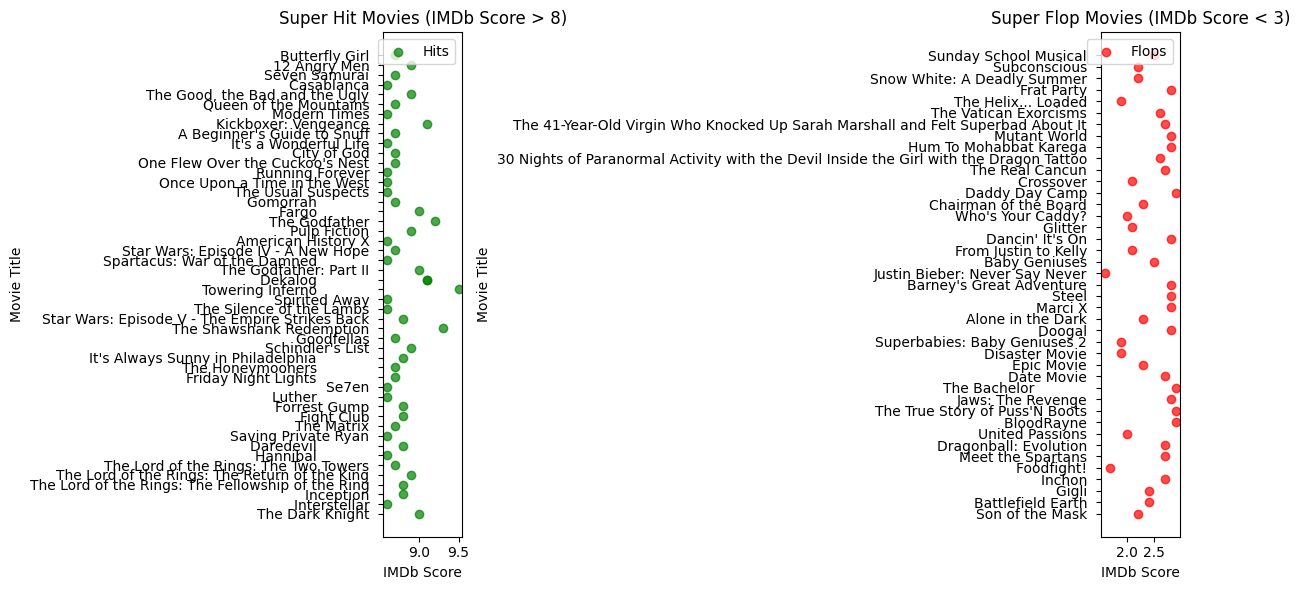

In [89]:
# Filtering movies with IMDb ratings greater than 8.5 (hits)
hits_df = df[df['imdb_score'] > 8.5]

# Filtering movies with IMDb ratings less than 3 (flops)
flops_df = df[df['imdb_score'] < 3]

# Creating scatter plots
plt.figure(figsize=(12, 6))

# Hits plot
plt.subplot(1, 2, 1)
plt.scatter(hits_df['imdb_score'], hits_df['movie_title'], color='green', alpha=0.7, label='Hits')
plt.xlabel("IMDb Score")
plt.ylabel("Movie Title")
plt.title("Super Hit Movies (IMDb Score > 8)")
plt.legend()

# Flops plot
plt.subplot(1, 2, 2)
plt.scatter(flops_df['imdb_score'], flops_df['movie_title'], color='red', alpha=0.7, label='Flops')
plt.xlabel("IMDb Score")
plt.ylabel("Movie Title")
plt.title("Super Flop Movies (IMDb Score < 3)")
plt.legend()

plt.tight_layout()
plt.show()


In [90]:
# Checking if the nodes in the graph are weighted

def are_nodes_weighted(graph):
    for node in graph.nodes():
        if 'weight' in graph.nodes[node]:
            return True
    return False

if are_nodes_weighted(G):
    print("The nodes in the graph are weighted.")
else:
    print("The nodes in the graph are not weighted.")


The nodes in the graph are weighted.


In [91]:
# Computing degree centrality
deg_centrality = nx.degree_centrality(G)

# Print degree centrality for each movie
for movie, centrality in deg_centrality.items():
    print(f"{movie}: Degree Centrality = {centrality:.4f}")



Avatar : Degree Centrality = 0.4050
Pirates of the Caribbean: At World's End : Degree Centrality = 0.3668
Spectre : Degree Centrality = 0.4668
The Dark Knight Rises : Degree Centrality = 0.3875
Star Wars: Episode VII - The Force Awakens             : Degree Centrality = 0.0244
John Carter : Degree Centrality = 0.3572
Spider-Man 3 : Degree Centrality = 0.5043
Tangled : Degree Centrality = 0.6231
Avengers: Age of Ultron : Degree Centrality = 0.3572
Harry Potter and the Half-Blood Prince : Degree Centrality = 0.3598
Batman v Superman: Dawn of Justice : Degree Centrality = 0.3572
Superman Returns : Degree Centrality = 0.3572
Quantum of Solace : Degree Centrality = 0.3153
Pirates of the Caribbean: Dead Man's Chest : Degree Centrality = 0.3668
The Lone Ranger : Degree Centrality = 0.3251
Man of Steel : Degree Centrality = 0.4050
The Chronicles of Narnia: Prince Caspian : Degree Centrality = 0.4013
The Avengers : Degree Centrality = 0.3572
Pirates of the Caribbean: On Stranger Tides : Degree 

C:\Users\HP\AppData\Local\Temp\ipykernel_3372\2754786886.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette="viridis")


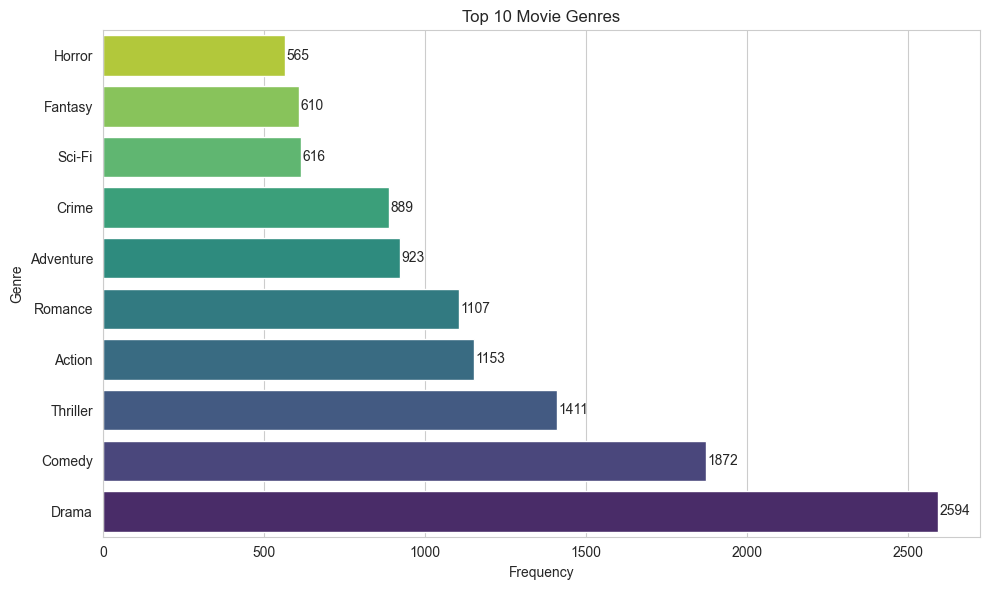

In [92]:
import seaborn as sns

# Seaborn styling
sns.set_style("whitegrid")

# Splitting the genres (assuming they are separated by '|')
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()

# Getting the top 10 genres
top_10_genres = genre_counts.head(10)

# Creating a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette="viridis")

plt.xlabel("Frequency")
plt.ylabel("Genre")
plt.title("Top 10 Movie Genres")
plt.gca().invert_yaxis()  # Inverting y-axis for better readability

# Adding value labels to the bars
for i, count in enumerate(top_10_genres):
    plt.text(count + 5, i, str(count), va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [94]:
!pip install community
!pip install python-louvain

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---------------------------------------- 101.7/101.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for community: filename=community-1.0.0b1-py3-none-any.whl size=2144 sha256=910d4c6fc234c09e0a9f1304a17edaf5b74ad946b311276c2c7fa4abb7804094
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\b7\c9\3f\e222b011e31d3d1de1fd799caed228f770d56f66563014285d
Successfully built community
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     --------- ----------------------------- 51.2/204.6 kB 2.6 MB/s eta 0:00:01
     ------------------------------------ - 194.6/204.6 kB 2.9 MB/s eta 0:00:01
     -------------------------------------- 20

In [95]:
# Modularity of the Graph
import community

# Detecting communities using Louvain algorithm
part = community.best_partition(G)

# Calculating modularity
modularity = community.modularity(part, G)

print(f"Modularity: {modularity}")

Modularity: 0.19685691354401608


In [97]:
# Sub-graph of first 500 Rows

# Selecting the first 500 rows
df_subset = df.head(500)

# Creating a sub-graph
G1 = nx.Graph()

# Addiing nodes to the graph
for _, row in df_subset.iterrows():
    movie_title = row['movie_title']
    G1.add_node(movie_title)

# Adding edges to the graph
for i, movie1 in enumerate(df_subset['movie_title']):
    for j, movie2 in enumerate(df_subset['movie_title']):
        if i != j:
            genres1 = set(df_subset.loc[i, 'genres'].split('|'))
            genres2 = set(df_subset.loc[j, 'genres'].split('|'))
            common_genres = genres1 & genres2
            if common_genres:
                G1.add_edge(movie1, movie2, genres=common_genres)


In [98]:
# Clustering Coefficient of the Sub-Graph with 500 Rows
clustering = nx.clustering(G1)
average_clustering_coefficient = nx.average_clustering(G1)

print(f"Average clustering coefficient: {average_clustering_coefficient:.4f}")

Average clustering coefficient: 0.8587
